In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff
    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val
    def bestfitpoly(self,points,deg):
      A=[[0 for i in range(deg+1)] for j in range(deg+1)]
      B=[0 for i in range(deg+1)]
      for i in range(deg+1):
        for j in range(deg+1):
          A[i][j]=sum([x[0]**(i+j) for x in points])
        B[i]=sum([x[1]*(x[0]**i) for x in points])
      x=np.linalg.solve(A,B)
      p=Polynomial(x)
      return p

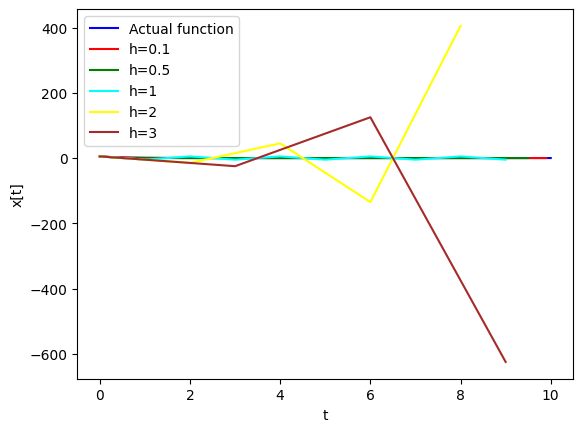

In [ ]:
#Q1
def forward_euler(h):
  t=np.arange(0,10,h)
  x=[5]
  for n in range(1,len(t)):
    val=x[n-1]+h*(-2*x[n-1])
    x.append(val)
  return t,x

def actual_func(x):
  return 5*math.exp(-2*x)

hlist=[0.1,0.5,1,2,3]
x_points=np.linspace(0,10,100)
y_actual=[actual_func(i) for i in x_points]
plt.plot(x_points,y_actual,color="b",label="Actual function")

colours=["red","green","cyan","yellow","brown"]
c={j:k for (j,k) in zip(hlist,colours)}
for h in hlist:
  t,x=forward_euler(h)
  p=Polynomial([0])
  poly=p.bestfitpoly([(i,j) for (i,j) in zip(t,x)],len(t)-1)
  plt.plot(t,poly[t],color=c[h],label=f"h={h}")

plt.xlabel("t")
plt.ylabel("x[t]")
plt.legend()
plt.show()

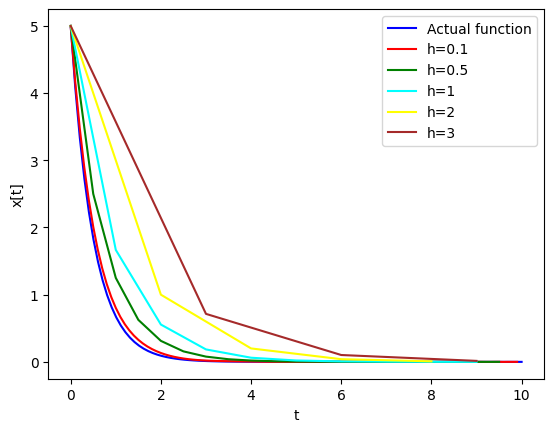

In [ ]:
#Q2
def backward_euler(h):
  t=np.arange(0,10,h)
  x=[5]
  for n in range(1,len(t)):
    val=x[n-1]/(1+2*h)
    x.append(val)
  return t,x

def actual_func(x):
  return 5*math.exp(-2*x)

hlist=[0.1,0.5,1,2,3]
x_points=np.linspace(0,10,100)
y_actual=[actual_func(i) for i in x_points]
plt.plot(x_points,y_actual,color="b",label="Actual function")

colours=["red","green","cyan","yellow","brown"]
c={j:k for (j,k) in zip(hlist,colours)}
for h in hlist:
  t,x=backward_euler(h)
  p=Polynomial([0])
  poly=p.bestfitpoly([(i,j) for (i,j) in zip(t,x)],len(t)-1)
  plt.plot(t,poly[t],color=c[h],label=f"h={h}")

plt.xlabel("t")
plt.ylabel("x[t]")
plt.legend()
plt.show()

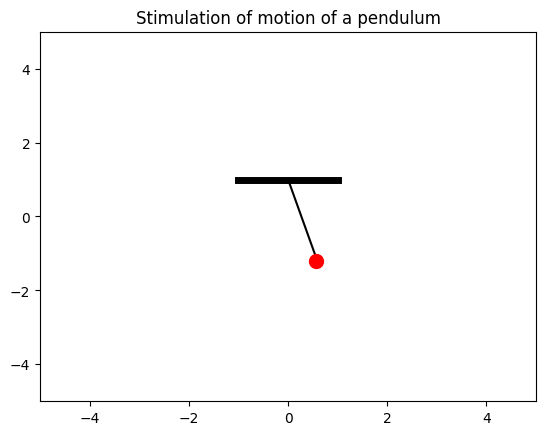

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

g = 9.8 # Acceleration due to gravity
length_of_pendulum = 1.25 # length of the pendulum
t = 200 # time

def d2_theta_d_t2(theta):
    return  -(g/length_of_pendulum)*math.sin(theta)

#Euler's forward method to solve the system
def theta(t):
    th = math.pi/2.5
    w = 0 #Omega=d_theta/dt
    dt = 0.001 # delta t increment
    m=np.arange(0,t,dt)
    for i in m:
        th=th+w*dt
        w=w+d2_theta_d_t2(th)*dt
    return th
# plot for the pendulum


fig, ax = plt.subplots()
plt.title("Stimulation of motion of a pendulum")
plt.plot([-1,1],[1,1],'k',linewidth=5) # Pendulum support horizental line
plt.xlim(-5,5)
plt.ylim(-5,5)
f,= plt.plot(0, 0,'k') # Base condition Pendulum returns to origin after a rotation
bob, = plt.plot(0, 0, 'o', markersize=10, color='red')

x = [0,0]
y = [1,1]

def pendulum(i):
    a = length_of_pendulum*math.sin(theta(i)) # L *sin(theta)
    b = -length_of_pendulum*math.cos(theta(i)) # -L *cos(theta)

    x[1] = a
    y[1] = b
    # add bob to the end of the pendulum
    bob_x = a
    bob_y = b - 0.1 # adjust the y-coordinate of the bob to make it below the pendulum stick

    # update the data for the bob
    bob.set_data([bob_x], [bob_y])

    f.set_xdata(x)
    f.set_ydata(y)

    return bob,f,
# Animation for the pendulum
anim=FuncAnimation(fig, func=pendulum, frames=np.arange(0,100,0.03),interval = 10)

# Define the file location for the GIF
d_loc = r"D:\IIT PKD\2nd Sem\Computational Methods\animation_Q3.gif"

# Define the writer object for the animation
m = animation.PillowWriter(fps=5)

# Save the animation to the specified file location
anim.save(d_loc, writer=m)
plt.show()